In [1]:
import requests
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = 'https://gql.tokopedia.com/graphql/SearchProductQueryV4'

In [3]:
payload = [{
    'operationName': "SearchProductQueryV4",
    'variables': {
        "params": "device=desktop&navsource=&ob=23&page={}&q={}&related=true&rows=60&safe_search=false&scheme=https&shipping=&source=search&srp_component_id=02.01.00.00&srp_page_id=&srp_page_title=&st=product&start={}&topads_bucket=true&unique_id=330142c9d1c168eaabef95522c06e1fa&user_addressId=44389028&user_cityId=167&user_districtId=2202&user_id=24265242&user_lat=-6.218126229670426&user_long=107.01841201633215&user_postCode=17123&user_warehouseId=12941747&variants=&warehouses=12941747%232h%2C0%2315m"
        },
    'query': "query SearchProductQueryV4($params: String!) {\n  ace_search_product_v4(params: $params) {\n    header {\n      totalData\n      totalDataText\n      processTime\n      responseCode\n      errorMessage\n      additionalParams\n      keywordProcess\n      componentId\n      __typename\n    }\n    data {\n      banner {\n        position\n        text\n        imageUrl\n        url\n        componentId\n        trackingOption\n        __typename\n      }\n      backendFilters\n      isQuerySafe\n      ticker {\n        text\n        query\n        typeId\n        componentId\n        trackingOption\n        __typename\n      }\n      redirection {\n        redirectUrl\n        departmentId\n        __typename\n      }\n      related {\n        position\n        trackingOption\n        relatedKeyword\n        otherRelated {\n          keyword\n          url\n          product {\n            id\n            name\n            price\n            imageUrl\n            rating\n            countReview\n            url\n            priceStr\n            wishlist\n            shop {\n              city\n              isOfficial\n              isPowerBadge\n              __typename\n            }\n            ads {\n              adsId: id\n              productClickUrl\n              productWishlistUrl\n              shopClickUrl\n              productViewUrl\n              __typename\n            }\n            badges {\n              title\n              imageUrl\n              show\n              __typename\n            }\n            ratingAverage\n            labelGroups {\n              position\n              type\n              title\n              url\n              __typename\n            }\n            componentId\n            __typename\n          }\n          componentId\n          __typename\n        }\n        __typename\n      }\n      suggestion {\n        currentKeyword\n        suggestion\n        suggestionCount\n        instead\n        insteadCount\n        query\n        text\n        componentId\n        trackingOption\n        __typename\n      }\n      products {\n        id\n        name\n        ads {\n          adsId: id\n          productClickUrl\n          productWishlistUrl\n          productViewUrl\n          __typename\n        }\n        badges {\n          title\n          imageUrl\n          show\n          __typename\n        }\n        category: departmentId\n        categoryBreadcrumb\n        categoryId\n        categoryName\n        countReview\n        customVideoURL\n        discountPercentage\n        gaKey\n        imageUrl\n        labelGroups {\n          position\n          title\n          type\n          url\n          __typename\n        }\n        originalPrice\n        price\n        priceRange\n        rating\n        ratingAverage\n        shop {\n          shopId: id\n          name\n          url\n          city\n          isOfficial\n          isPowerBadge\n          __typename\n        }\n        url\n        wishlist\n        sourceEngine: source_engine\n        __typename\n      }\n      violation {\n        headerText\n        descriptionText\n        imageURL\n        ctaURL\n        ctaApplink\n        buttonText\n        buttonType\n        __typename\n      }\n      __typename\n    }\n    __typename\n  }\n}\n"
}]

In [4]:
req = requests.post(url, json=payload).json()
rows = req[0]['data']['ace_search_product_v4']['data']['products']
print(len(rows))

60


In [5]:
print(req)

[{'data': {'ace_search_product_v4': {'header': {'totalData': 13864337, 'totalDataText': '13.6jt+', 'processTime': 0.380667149, 'responseCode': 6, 'errorMessage': '', 'additionalParams': 'rf=true&nuq=ac', 'keywordProcess': '7', 'componentId': '02.01.00.00', '__typename': 'AceSearchUnifyHeader'}, 'data': {'banner': {'position': 0, 'text': '', 'imageUrl': '', 'url': '', 'componentId': '', 'trackingOption': 0, '__typename': 'AceSearchUnifyBanner'}, 'backendFilters': '&ob=104', 'isQuerySafe': True, 'ticker': {'text': '', 'query': '', 'typeId': 0, 'componentId': '', 'trackingOption': 0, '__typename': 'AceSearchUnifyTicker'}, 'redirection': {'redirectUrl': '', 'departmentId': 0, '__typename': 'AceSearchUnifyRedirection'}, 'related': {'position': 0, 'trackingOption': 0, 'relatedKeyword': 'ac', 'otherRelated': [], '__typename': 'AceSearchUnifyRelated'}, 'suggestion': {'currentKeyword': '{}', 'suggestion': 'ac', 'suggestionCount': 13858396, 'instead': '', 'insteadCount': 0, 'query': '', 'text': 

In [8]:
for i in range(0, len(rows)):
    no = i
    nama_produk = rows[i]['name']
    harga = rows[i]['price']
    rating = rows[i]['ratingAverage']
    toko = rows[i]['shop']['name']
    lokasi = rows[i]['shop']['city']
    tjl = rows[i]['labelGroups']
    terjual = ''
    for i in tjl:
        if tjl[0]['position'] == 'costperunit':
            terjual = ''
        elif tjl[0]['title'] == 'PreOrder':
            terjual = ''
        elif tjl[0]['title'] == 'Grosir':
            terjual = ''
        elif tjl[0]['title'] == 'Produk Terbaru':
            terjual = ''
        elif tjl[0]['title'] =='Cashback':
            terjual = ''
        else:
            terjual = tjl[0]['title']
    #terjual = next((rows[i]['labelGroups'][0]['title'] for item in rows[i]['labelGroups'][0] if rows[i]['labelGroups'][0]['position'] == 'integrity'), None)
    print(no, nama_produk, harga, rating, toko, lokasi, terjual)

0 LG AC STANDART H05TN4 H05-TN4 [1/2 PK] GARANSI RESMI Rp2.499.401 4.9 sinar agung electronic Kab. Bekasi 
1 AC SAMSUNG 1/2 PK STANDARD AR05TGHQASINSE Rp2.899.000 4.9 Courts Elektronik Bekasi 
2 AC DAIKIN FTP 25 AV14 RV 1 PK + PASANG R32 STANDARD MALAYSIA LOW WATT Rp3.773.500 4.8 MJ GROSIR ELEKTRONIK Bekasi 
3 AC DAIKIN FTP 15 AV14 0.5 PK 1/2PK + PASANG R32 STANDARD MALAYSIA LOW Rp3.479.500 4.8 MJ GROSIR ELEKTRONIK Bekasi Terlaris
4 modul Ac universal Rp95.000 5.0 karya teknik ac Bekasi 
5 AC AQUA JAPAN AQA KR 05 AHP KR05AHP 1/2 PK + PASANG R32 LOW WATT Rp2.939.000 5.0 MJ GROSIR ELEKTRONIK Bekasi 
6 promo ac watt rendah dingin second 1/2 pk ,3/4 pk,1pk Rp1.915.000 4.8 SETIATEKNIK07 Bekasi Terjual 250+
7 Plastik Cuci AC Besar 1/2 PK - 2 PK | Cover Cuci AC Rp27.000 4.9 MC Cool Part Bekasi Terjual 100+
8 termis/thermistor ac daikin tipe FTC /FTKQ ori daikin Rp99.999 4.9 karya teknik ac Bekasi Terjual 70+
9 Outdoor AC Sharp UK 1/2 Pk tipe 05 UCY Rp1.400.000 4.9 karya teknik ac Bekasi Sisa 

In [9]:
len(terjual)

0

In [10]:
search = 'Abado 50 wp'
url = 'https://gql.tokopedia.com/graphql/SearchProductQueryV4'

def get_param():
    params = []
    for i in range(1,27):
        param = "device=desktop&navsource=&ob=23&page={}&q={}&related=true&rows=60&safe_search=false&scheme=https&shipping=&source=search&srp_component_id=02.01.00.00&srp_page_id=&srp_page_title=&st=product&start={}&topads_bucket=true&unique_id=330142c9d1c168eaabef95522c06e1fa&user_addressId=44389028&user_cityId=167&user_districtId=2202&user_id=24265242&user_lat=-6.218126229670426&user_long=107.01841201633215&user_postCode=17123&user_warehouseId=12941747&variants=&warehouses=12941747%232h%2C0%2315m".format(i, search, (i-1)*60)
        params.append(param)

    return params

def scraped(param):
    payload = [{
    'operationName': "SearchProductQueryV4",
    'variables': {
        "params": param
        },
    'query': "query SearchProductQueryV4($params: String!) {\n  ace_search_product_v4(params: $params) {\n    header {\n      totalData\n      totalDataText\n      processTime\n      responseCode\n      errorMessage\n      additionalParams\n      keywordProcess\n      componentId\n      __typename\n    }\n    data {\n      banner {\n        position\n        text\n        imageUrl\n        url\n        componentId\n        trackingOption\n        __typename\n      }\n      backendFilters\n      isQuerySafe\n      ticker {\n        text\n        query\n        typeId\n        componentId\n        trackingOption\n        __typename\n      }\n      redirection {\n        redirectUrl\n        departmentId\n        __typename\n      }\n      related {\n        position\n        trackingOption\n        relatedKeyword\n        otherRelated {\n          keyword\n          url\n          product {\n            id\n            name\n            price\n            imageUrl\n            rating\n            countReview\n            url\n            priceStr\n            wishlist\n            shop {\n              city\n              isOfficial\n              isPowerBadge\n              __typename\n            }\n            ads {\n              adsId: id\n              productClickUrl\n              productWishlistUrl\n              shopClickUrl\n              productViewUrl\n              __typename\n            }\n            badges {\n              title\n              imageUrl\n              show\n              __typename\n            }\n            ratingAverage\n            labelGroups {\n              position\n              type\n              title\n              url\n              __typename\n            }\n            componentId\n            __typename\n          }\n          componentId\n          __typename\n        }\n        __typename\n      }\n      suggestion {\n        currentKeyword\n        suggestion\n        suggestionCount\n        instead\n        insteadCount\n        query\n        text\n        componentId\n        trackingOption\n        __typename\n      }\n      products {\n        id\n        name\n        ads {\n          adsId: id\n          productClickUrl\n          productWishlistUrl\n          productViewUrl\n          __typename\n        }\n        badges {\n          title\n          imageUrl\n          show\n          __typename\n        }\n        category: departmentId\n        categoryBreadcrumb\n        categoryId\n        categoryName\n        countReview\n        customVideoURL\n        discountPercentage\n        gaKey\n        imageUrl\n        labelGroups {\n          position\n          title\n          type\n          url\n          __typename\n        }\n        originalPrice\n        price\n        priceRange\n        rating\n        ratingAverage\n        shop {\n          shopId: id\n          name\n          url\n          city\n          isOfficial\n          isPowerBadge\n          __typename\n        }\n        url\n        wishlist\n        sourceEngine: source_engine\n        __typename\n      }\n      violation {\n        headerText\n        descriptionText\n        imageURL\n        ctaURL\n        ctaApplink\n        buttonText\n        buttonType\n        __typename\n      }\n      __typename\n    }\n    __typename\n  }\n}\n"
    }]

    req = requests.post(url, json=payload).json()
    rows = req[0]['data']['ace_search_product_v4']['data']['products']
    #print(len(rows))
    scraped = []
    for i in range(0, len(rows)):
        no = i
        toko = rows[i]['shop']['name']
        lokasi = rows[i]['shop']['city']
        nama_produk = rows[i]['name']
        harga = rows[i]['price']
        rating = rows[i]['ratingAverage']
        tjl = rows[i]['labelGroups']
        terjual = ''
        for i in tjl:
            if tjl[0]['position'] == 'costperunit':
                terjual = ''
            elif tjl[0]['title'] == 'PreOrder':
                terjual = ''
            elif tjl[0]['title'] == 'Grosir':
                terjual = ''
            elif tjl[0]['title'] == 'Produk Terbaru':
                terjual = ''
            elif tjl[0]['title'] =='Cashback':
                terjual = ''
            else:
                terjual = tjl[0]['title']
        scraped.append((
            nama_produk, harga, rating, toko, lokasi, terjual
        ))
    return scraped

if __name__ == '__main__':
    params = get_param()
    all_data = []
    for i in range(0, len(params)):
        param = params[i]
        data = scraped(param)
        all_data.extend(data)
    #print(all_data)
    df_Abado_50_wp = pd.DataFrame(all_data, columns=['Nama Produk', 'Harga', 'Rating', 'Toko', 'Lokasi', 'Terjual'])

In [ ]:
#params_all = "device=desktop&navsource=&ob=23&page={}&q={}&related=true&rows=60&safe_search=false&scheme=https&shipping=&source=search&srp_component_id=02.01.00.00&srp_page_id=&srp_page_title=&st=product&start={}&topads_bucket=true&unique_id=330142c9d1c168eaabef95522c06e1fa&user_addressId=44389028&user_cityId=167&user_districtId=2202&user_id=24265242&user_lat=-6.218126229670426&user_long=107.01841201633215&user_postCode=17123&user_warehouseId=12941747&variants=&warehouses=12941747%232h%2C0%2315m".format(page, start)

In [11]:
df_Abado_50_wp

,Nama Produk,Harga,Rating,Toko,Lokasi,Terjual
0,ABADO 50 WP - 40gr / FUNGISIDA Atasi Penyakit ...,Rp26.900,5.0,KIU Shop - Karisma Indoagro Universal,Kab. Jember,
1,ABADO 50 WP 40 gram FUNGISIDA pembasmi busuk daun,Rp31.000,,luwes tani,Kab. Kendal,
2,Abado 50 Wp - 40gr Fungisida Atasi Penyakit Bu...,Rp77.310,,viraol,Kab. Gresik,
3,SALM Abado 50 Wp 40Gr Fungisida Pembasmi Busuk...,Rp61.000,,salmaaufa,Surakarta,
4,Abado 50 WP 40gr fungisida pembasmi busuk daun,Rp45.000,,phovemax,Surabaya,
5,ABADO 50 WP - 10gr / FUNGISIDA Atasi Penyakit ...,Rp7.900,,KIU Shop - Karisma Indoagro Universal,Kab. Jember,
6,ABADO 50 WP - 10gr / FUNGISIDA Atasi Penyakit ...,Rp66.000,,"Halo, edidedi",Jakarta Barat,
7,ABADO 50 WP 40 gram FUNGISIDA pembasmi busuk daun,Rp101.000,,"Halo, edibasa",Jakarta Barat,
8,Sedia ABADO 50 WP - 40gr / FUNGISIDA Atasi Pen...,Rp41.000,,Amarta ID,Semarang,
9,ABR Abado 50 Wp 40Gr Fungisida Pembasmi Busuk ...,Rp56.000,,abiarka_online,Semarang,


In [12]:
df_Abado_50_wp['Terjual'].unique()

array([''], dtype=object)

In [13]:
df_Abado_50_wp.loc[df_Abado_50_wp['Terjual'] == 'Terjual 1', 'Terjual_num1'] = '1'
df_Abado_50_wp.loc[df_Abado_50_wp['Terjual'] == 'Terjual 2', 'Terjual_num1'] = '2'
df_Abado_50_wp.loc[df_Abado_50_wp['Terjual'] == 'Terjual 3', 'Terjual_num1'] = '3'
df_Abado_50_wp.loc[df_Abado_50_wp['Terjual'] == 'Terjual 4', 'Terjual_num1'] = '4'
df_Abado_50_wp.loc[df_Abado_50_wp['Terjual'] == 'Terjual 5', 'Terjual_num1'] = '5'
df_Abado_50_wp.loc[df_Abado_50_wp['Terjual'] == 'Terjual 6', 'Terjual_num1'] = '6'
df_Abado_50_wp.loc[df_Abado_50_wp['Terjual'] == 'Terjual 7', 'Terjual_num1'] = '7'
df_Abado_50_wp.loc[df_Abado_50_wp['Terjual'] == 'Terjual 8', 'Terjual_num1'] = '8'
df_Abado_50_wp.loc[df_Abado_50_wp['Terjual'] == 'Terjual 9', 'Terjual_num1'] = '9'
df_Abado_50_wp.loc[df_Abado_50_wp['Terjual'] == 'Terjual 10', 'Terjual_num1'] = '10'
df_Abado_50_wp.loc[df_Abado_50_wp['Terjual'] == 'Terjual 11', 'Terjual_num1'] = '11'
df_Abado_50_wp.loc[df_Abado_50_wp['Terjual'] == 'Terjual 12', 'Terjual_num1'] = '12'
df_Abado_50_wp.loc[df_Abado_50_wp['Terjual'] == 'Terjual 13', 'Terjual_num1'] = '13'
df_Abado_50_wp.loc[df_Abado_50_wp['Terjual'] == 'Terjual 15', 'Terjual_num1'] = '15'
df_Abado_50_wp.loc[df_Abado_50_wp['Terjual'] == 'Terjual 16', 'Terjual_num1'] = '16'
df_Abado_50_wp.loc[df_Abado_50_wp['Terjual'] == 'Terjual 18', 'Terjual_num1'] = '18'
df_Abado_50_wp.loc[df_Abado_50_wp['Terjual'] == 'Terjual 19', 'Terjual_num1'] = '19'
df_Abado_50_wp.loc[df_Abado_50_wp['Terjual'] == 'Terjual 20', 'Terjual_num1'] = '20'
df_Abado_50_wp.loc[df_Abado_50_wp['Terjual'] == 'Terjual 21', 'Terjual_num1'] = '21'
df_Abado_50_wp.loc[df_Abado_50_wp['Terjual'] == 'Terjual 22', 'Terjual_num1'] = '22'
df_Abado_50_wp.loc[df_Abado_50_wp['Terjual'] == 'Terjual 24', 'Terjual_num1'] = '24'
df_Abado_50_wp.loc[df_Abado_50_wp['Terjual'] == 'Terjual 25', 'Terjual_num1'] = '25'
df_Abado_50_wp.loc[df_Abado_50_wp['Terjual'] == 'Terjual 28', 'Terjual_num1'] = '28'
df_Abado_50_wp.loc[df_Abado_50_wp['Terjual'] == 'Terjual 30+', 'Terjual_num1'] = '30'
df_Abado_50_wp.loc[df_Abado_50_wp['Terjual'] == 'Terjual 50+', 'Terjual_num1'] = '50'
df_Abado_50_wp.loc[df_Abado_50_wp['Terjual'] == 'Terjual 60+', 'Terjual_num1'] = '60'
df_Abado_50_wp.loc[df_Abado_50_wp['Terjual'] == 'Terjual 80+', 'Terjual_num1'] = '80'
df_Abado_50_wp.loc[df_Abado_50_wp['Terjual'] == 'Terjual 250+', 'Terjual_num1'] = '250'
df_Abado_50_wp.loc[df_Abado_50_wp['Terjual'] == 'Terjual 500+', 'Terjual_num1'] = '500'
df_Abado_50_wp.loc[df_Abado_50_wp['Terjual'] == 'Terjual 750+', 'Terjual_num1'] = '750'
df_Abado_50_wp.loc[df_Abado_50_wp['Terjual'] == 'Terjual 1 rb+', 'Terjual_num1'] = '1000'
df_Abado_50_wp.loc[df_Abado_50_wp['Terjual'] == 'Terjual 3 rb+', 'Terjual_num1'] = '3000'
df_Abado_50_wp.loc[df_Abado_50_wp['Terjual'] == 'Terjual 4 rb+', 'Terjual_num1'] = '4000'

In [14]:
df_Abado_50_wp['Terjual_num1'] = df_Abado_50_wp['Terjual_num1'].astype(float)

In [15]:
df_Abado_50_wp['Rating'] = df_Abado_50_wp['Rating'].replace('', np.nan, regex=True)
df_Abado_50_wp['Rating'] = df_Abado_50_wp['Rating'].astype(float)

In [16]:
df_Abado_50_wp['Harga'] = df_Abado_50_wp['Harga'].str.replace(r'\D', '')

C:\Users\i_fes\AppData\Local\Temp\ipykernel_17468\3340493064.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_Abado_50_wp['Harga'] = df_Abado_50_wp['Harga'].str.replace(r'\D', '')


In [17]:
df_Abado_50_wp['Harga'] = df_Abado_50_wp['Harga'].astype(float)

In [18]:
df_Abado_50_wp.dtypes

Nama Produk      object
Harga           float64
Rating          float64
Toko             object
Lokasi           object
Terjual          object
Terjual_num1    float64
dtype: object

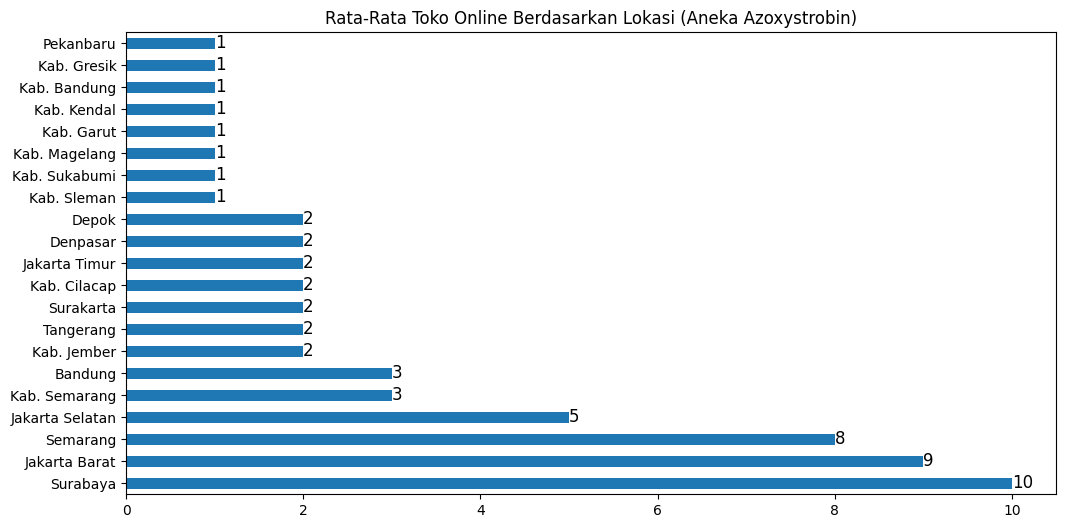

In [19]:
ax = df_Abado_50_wp['Lokasi'].value_counts() \
    .plot(kind= 'barh', figsize = (12,6), title='Rata-Rata Toko Online Berdasarkan Lokasi (Aneka Azoxystrobin)')

plt.ticklabel_format(style='plain', axis='x')

ax.bar_label(ax.containers[0], label_type = 'edge', fmt = '%d', fontsize = 12)

plt.show()

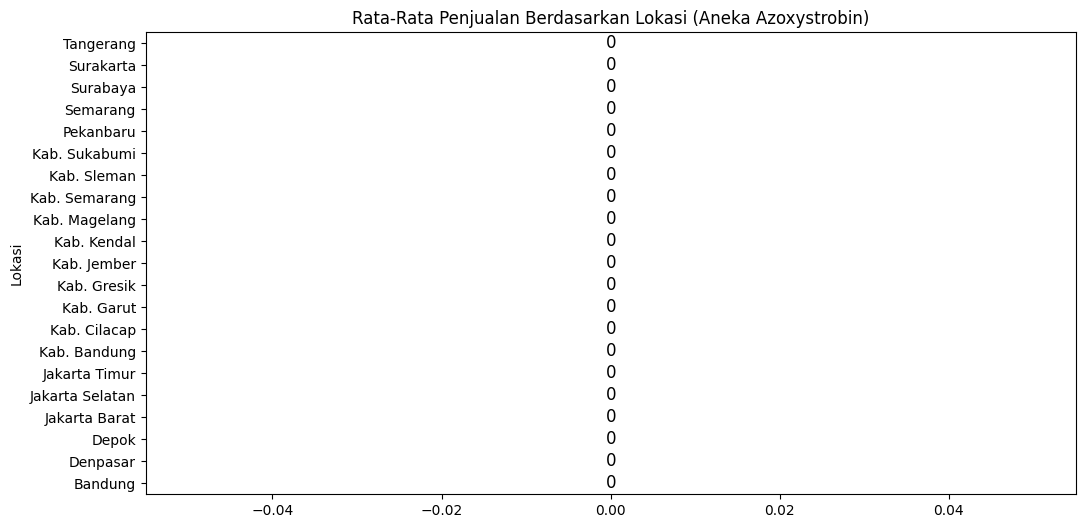

In [20]:
ax = df_Abado_50_wp.groupby('Lokasi')['Terjual_num1'].mean().sort_values(ascending=False) \
    .plot(kind= 'barh', figsize = (12,6), title='Rata-Rata Penjualan Berdasarkan Lokasi (Aneka Azoxystrobin)')
ax.bar_label(ax.containers[0], label_type = 'center', fmt = '%d', fontsize=12)
plt.show()

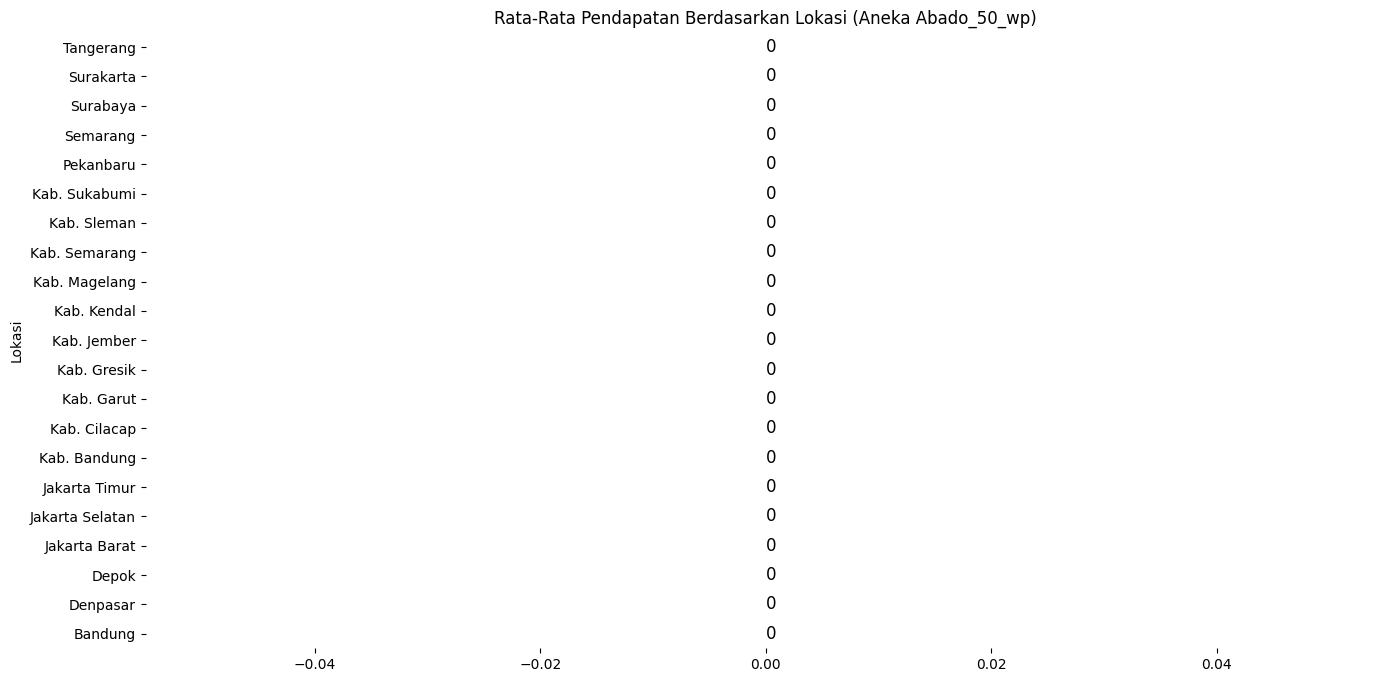

In [21]:
df_Abado_50_wp['Pendapatan'] = df_Abado_50_wp['Terjual_num1']*df_Abado_50_wp['Harga']
my_colors = list('bbgbb')

ax = df_Abado_50_wp.groupby('Lokasi')['Pendapatan'].mean().sort_values(ascending=False) \
    .plot(kind= 'barh', figsize = (16,8), title='Rata-Rata Pendapatan Berdasarkan Lokasi (Aneka Abado_50_wp)', color=my_colors)
plt.ticklabel_format(style='plain', axis='x')

ax.bar_label(ax.containers[0], label_type = 'edge', fmt = '%d', fontsize=12)
for spine in ax.spines:
    ax.spines[spine].set_visible(False)

#rects = ax.patches

#labels = [f"label{i}" for i in range(len(rects))]


#for rect, label in zip(rects, labels):
#    height = rect.get_height()
#    ax.text(
#        rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom"
#    )

plt.show()

C:\Users\i_fes\AppData\Local\Temp\ipykernel_17468\3494260365.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df_Abado_50_wp.dropna().corr()
d:\PROGRAM\Programs\Python\Python39\lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
d:\PROGRAM\Programs\Python\Python39\lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


<Axes: >

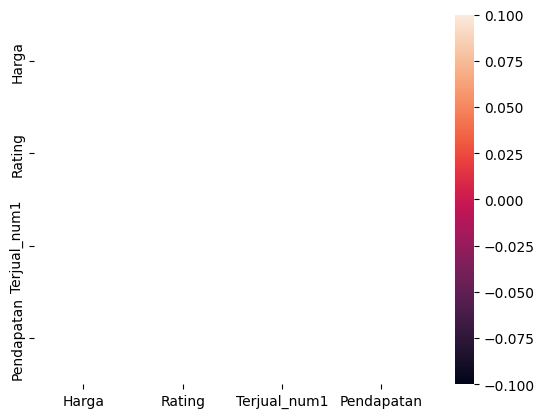

In [22]:
df_corr = df_Abado_50_wp.dropna().corr()
sns.heatmap(df_corr, annot = True)

In [ ]:
#df_Abado_50_wp.to_excel('Tokped_Daging_API.xlsx', index=False)